In [87]:
import requests
import pandas as pd
import json
from data_cleaning import remove_duplicates, fill_nulls, estandarizar_columnas
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
csv_filename = r"C:\Users\delam\OneDrive\Ironhack\Proyecto semana 3\archive\beer_profile_and_ratings.csv" 
df_cervezas = pd.read_csv(csv_filename)


In [89]:
csv_filename = r"C:\Users\delam\OneDrive\Ironhack\Proyecto semana 3\archive\archive (1)\beers.csv"
df_cervezas_2 = pd.read_csv(csv_filename)

In [90]:
csv_filename = r"C:\Users\delam\OneDrive\Ironhack\Proyecto semana 3\archive\archive (1)\breweries.csv"
df_cervezas_3 = pd.read_csv(csv_filename)


In [91]:
def obtener_todas_cervecerias_us():

    base_url = "https://api.openbrewerydb.org/v1/breweries"
    cervecerias_totales = []
    page_number = 1
    per_page = 200  # Intentamos el límite máximo común de 200 por página

    while True:
        # 1. Definir los parámetros de la solicitud
        params = {'by_country': 'united states','page': page_number,'per_page': per_page}

        # 2. Enviar la solicitud GET
        response = requests.get(base_url, params=params)

        # 3. Verificar el estado de la respuesta
        if response.status_code != 200:
            break

        # 4. Procesar los datos JSON
        data_json = response.json()

        # 5. Condición de Parada
        # Si la API devuelve una lista vacía, hemos llegado al final de los resultados.
        if not data_json:
            print(f"Página {page_number}: No se encontraron más resultados. Deteniendo...")
            break

        # 6. Almacenar los resultados y avanzar
        cervecerias_totales.extend(data_json)
        print(f"Página {page_number} obtenida. Total de cervecerías recolectadas: {len(cervecerias_totales)}")
        page_number += 1
        
        # Opcional: Agregar un límite de seguridad para evitar bucles infinitos si la API falla
        if page_number > 15: 
            print("Límite de 15 páginas alcanzado. Deteniendo para evitar sobrecarga.")
            break

    # 7. Convertir la lista recolectada a DataFrame de Pandas
    df4_ampliado = pd.DataFrame(cervecerias_totales)
    
    print(f"\n¡Paginación finalizada! Se obtuvieron {len(df4_ampliado)} cervecerías en total.")
    return df4_ampliado

# --- Ejecución y Asignación ---
df_cervezas_4 = obtener_todas_cervecerias_us()

# Continuar con la limpieza de DF4
# (Ej: estandarizar nombres, asegurar unicidad de IDs, etc.)
# df4.rename(columns={'state_province': 'state'}, inplace=True)
# df4['name'] = df4['name'].str.lower().str.strip().str.replace(r'[^a-z0-9\s]', '', regex=True)
# ...

Página 1 obtenida. Total de cervecerías recolectadas: 200
Página 2 obtenida. Total de cervecerías recolectadas: 400
Página 3 obtenida. Total de cervecerías recolectadas: 600
Página 4 obtenida. Total de cervecerías recolectadas: 800
Página 5 obtenida. Total de cervecerías recolectadas: 1000
Página 6 obtenida. Total de cervecerías recolectadas: 1200
Página 7 obtenida. Total de cervecerías recolectadas: 1400
Página 8 obtenida. Total de cervecerías recolectadas: 1600
Página 9 obtenida. Total de cervecerías recolectadas: 1800
Página 10 obtenida. Total de cervecerías recolectadas: 2000
Página 11 obtenida. Total de cervecerías recolectadas: 2200
Página 12 obtenida. Total de cervecerías recolectadas: 2400
Página 13 obtenida. Total de cervecerías recolectadas: 2600
Página 14 obtenida. Total de cervecerías recolectadas: 2800
Página 15 obtenida. Total de cervecerías recolectadas: 3000
Límite de 15 páginas alcanzado. Deteniendo para evitar sobrecarga.

¡Paginación finalizada! Se obtuvieron 3000 ce

In [92]:
df_cervezas.head()


,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


In [93]:
df_cervezas_2.head()

,Unnamed: 0,count.x,abv,ibu,id,beer,style,brewery_id,ounces,style2,count.y,brewery,city,state,label
0,1,1,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,NaN,409,10 Barrel Brewing Company,Bend,OR,Pub Beer (10 Barrel Brewing Company)
1,2,2,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,American Pale Ale (APA),178,18th Street Brewery,Gary,IN,Devil's Cup (18th Street Brewery)
2,3,3,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,American IPA,178,18th Street Brewery,Gary,IN,Rise of the Phoenix (18th Street Brewery)
3,4,4,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,American Double / Imperial IPA,178,18th Street Brewery,Gary,IN,Sinister (18th Street Brewery)
4,5,5,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,American IPA,178,18th Street Brewery,Gary,IN,Sex and Candy (18th Street Brewery)


In [94]:
df_cervezas_3.head()

,id,name,address1,address2,city,state,code,country,phone,website,filepath,descript,last_mod
0,1,(512) Brewing Company,"407 Radam, F200",NaN,Austin,Texas,78745,United States,512.707.2337,http://512brewing.com/,NaN,(512) Brewing Company is a microbrewery locate...,2010-07-22 20:00:20
1,2,21st Amendment Brewery Cafe,563 Second Street,NaN,San Francisco,California,94107,United States,1-415-369-0900,http://www.21st-amendment.com/,NaN,The 21st Amendment Brewery offers a variety of...,2010-10-24 13:54:07
2,3,3 Fonteinen Brouwerij Ambachtelijke Geuzestekerij,Hoogstraat 2A,NaN,Beersel,Vlaams Brabant,NaN,Belgium,32-02-/-306-71-03,http://www.3fonteinen.be/index.htm,NaN,NaN,2010-07-22 20:00:20
3,4,Aass Brewery,Ole Steensgt. 10 Postboks 1530,NaN,Drammen,NaN,NaN,Norway,47-32-26-60-00,http://www.aass.no,NaN,Aass Brewery was established in 1834 and is th...,2010-07-22 20:00:20
4,5,Abbaye de Leffe,Dinant,NaN,Dinant,Namur,NaN,Belgium,NaN,NaN,NaN,NaN,2010-07-22 20:00:20


In [95]:
df_cervezas_4.head()

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,None,None,Norman,Oklahoma,73069-8224,United States,-97.468182,35.257389,4058160490,http://www.405brewing.com,Oklahoma,1716 Topeka St
1,9c5a66c8-cc13-416f-a5d9-0a769c87d318,(512) Brewing Co,micro,407 Radam Ln Ste F200,None,None,Austin,Texas,78745-1197,United States,NaN,NaN,5129211545,http://www.512brewing.com,Texas,407 Radam Ln Ste F200
2,34e8c68b-6146-453f-a4b9-1f6cd99a5ada,1 of Us Brewing Company,micro,8100 Washington Ave,None,None,Mount Pleasant,Wisconsin,53406-3920,United States,-87.883364,42.720108,2624847553,https://www.1ofusbrewing.com,Wisconsin,8100 Washington Ave
3,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,None,None,Bend,Oregon,97701-9847,United States,-121.281706,44.086835,5415851007,http://www.10barrel.com,Oregon,62970 18th St
4,e2e78bd8-80ff-4a61-a65c-3bfbd9d76ce2,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,None,None,Bend,Oregon,97703-2465,United States,-121.328802,44.057565,5415851007,None,Oregon,1135 NW Galveston Ave Ste B


In [96]:
print(df_cervezas.shape)
print(df_cervezas_2.shape)
print(df_cervezas_3.shape)
print(df_cervezas_4.shape)

(3197, 25)
(2410, 15)
(1414, 13)
(3000, 16)


In [97]:
print(df_cervezas.columns)
print(df_cervezas_2.columns)
print(df_cervezas_3.columns)
print(df_cervezas_4.columns)

Index(['Name', 'Style', 'Brewery', 'Beer Name (Full)', 'Description', 'ABV',
       'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')
Index(['Unnamed: 0', 'count.x', 'abv', 'ibu', 'id', 'beer', 'style',
       'brewery_id', 'ounces', 'style2', 'count.y', 'brewery', 'city', 'state',
       'label'],
      dtype='object')
Index(['id', 'name', 'address1', 'address2', 'city', 'state', 'code',
       'country', 'phone', 'website', 'filepath', 'descript', 'last_mod'],
      dtype='object')
Index(['id', 'name', 'brewery_type', 'address_1', 'address_2', 'address_3',
       'city', 'state_province', 'postal_code', 'country', 'longitude',
       'latitude', 'phone', 'website_url', 'state', 'street'],
      dtype='object')


In [98]:
df_cervezas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

In [99]:
df_cervezas_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   count.x     2410 non-null   int64  
 2   abv         2348 non-null   float64
 3   ibu         1405 non-null   float64
 4   id          2410 non-null   int64  
 5   beer        2410 non-null   object 
 6   style       2405 non-null   object 
 7   brewery_id  2410 non-null   int64  
 8   ounces      2410 non-null   float64
 9   style2      1112 non-null   object 
 10  count.y     2410 non-null   int64  
 11  brewery     2410 non-null   object 
 12  city        2410 non-null   object 
 13  state       2410 non-null   object 
 14  label       2410 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 282.6+ KB


In [100]:
df_cervezas_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1414 non-null   int64 
 1   name      1414 non-null   object
 2   address1  1145 non-null   object
 3   address2  4 non-null      object
 4   city      1392 non-null   object
 5   state     1232 non-null   object
 6   code      779 non-null    object
 7   country   1413 non-null   object
 8   phone     1099 non-null   object
 9   website   481 non-null    object
 10  filepath  15 non-null     object
 11  descript  239 non-null    object
 12  last_mod  1414 non-null   object
dtypes: int64(1), object(12)
memory usage: 143.7+ KB


In [101]:
df_cervezas_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3000 non-null   object 
 1   name            3000 non-null   object 
 2   brewery_type    3000 non-null   object 
 3   address_1       2742 non-null   object 
 4   address_2       4 non-null      object 
 5   address_3       0 non-null      object 
 6   city            3000 non-null   object 
 7   state_province  3000 non-null   object 
 8   postal_code     3000 non-null   object 
 9   country         3000 non-null   object 
 10  longitude       2181 non-null   float64
 11  latitude        2181 non-null   float64
 12  phone           2693 non-null   object 
 13  website_url     2568 non-null   object 
 14  state           3000 non-null   object 
 15  street          2742 non-null   object 
dtypes: float64(2), object(14)
memory usage: 375.1+ KB


## Proceso de limpieza

1. Eliminación de columnas que no voy a usar y estandarización de nombres en las columnas restantes

In [102]:
columns_to_drop_df1 = ['Beer Name (Full)', 'Description', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'review_aroma', 'review_appearance', 'review_palate']

df_cervezas.drop(columns=columns_to_drop_df1, axis=1, inplace=True)

df_cervezas = estandarizar_columnas(df_cervezas)

In [103]:
columns_to_drop_df2 = ['Unnamed: 0', 'count.x', 'ounces', 'style2', 'count.y', 'label']

df_cervezas_2.drop(columns=columns_to_drop_df2, axis=1, inplace=True)

df_cervezas_2 = estandarizar_columnas(df_cervezas_2)

In [104]:
columns_to_drop_df3 = ['address1', 'address2', 'code', 'phone', 'website', 'filepath', 'descript', 'last_mod']

df_cervezas_3.drop(columns=columns_to_drop_df3, axis=1, inplace=True)

df_cervezas_3 = estandarizar_columnas(df_cervezas_3)

In [105]:
columns_to_drop_df4 = ['address_1', 'address_2', 'address_3', 'postal_code','phone', 'website_url', 'street', 'country', 'state_province', 'longitude', 'latitude']

df_cervezas_4.drop(columns=columns_to_drop_df4, axis=1, inplace=True)

df_cervezas_4 = estandarizar_columnas(df_cervezas_4)

2. Manejo de nulos y duplicados, y corregir los tipos de datos necesarios

In [106]:
df_cervezas = remove_duplicates(df_cervezas)
df_cervezas['brewery'] = df_cervezas['brewery'].str.lower().str.strip().str.replace(r'[^a-z0-9\s]', '', regex=True)

df_cervezas['abv'].fillna(df_cervezas['abv'].mean(), inplace=True)
df_cervezas['review_overall'].fillna(df_cervezas['review_overall'].mean(), inplace=True)

C:\Users\delam\AppData\Local\Temp\ipykernel_22296\2785933495.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cervezas['abv'].fillna(df_cervezas['abv'].mean(), inplace=True)
C:\Users\delam\AppData\Local\Temp\ipykernel_22296\2785933495.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [107]:
df_cervezas_2 = remove_duplicates(df_cervezas_2)
df_cervezas_2['brewery'] = df_cervezas_2['brewery'].str.lower().str.strip().str.replace(r'[^a-z0-9\s]', '', regex=True)
df_cervezas_2['state'] = df_cervezas_2['state'].str.lower().str.strip()

df_cervezas_2['abv'] = pd.to_numeric(df_cervezas_2['abv'], errors='coerce')
df_cervezas_2['ibu'] = pd.to_numeric(df_cervezas_2['ibu'], errors='coerce')

df_cervezas_2['abv'].fillna(df_cervezas_2['abv'].mean(), inplace=True)
df_cervezas_2['ibu'].fillna(df_cervezas_2['ibu'].mean(), inplace=True)


C:\Users\delam\AppData\Local\Temp\ipykernel_22296\2905790604.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cervezas_2['abv'].fillna(df_cervezas_2['abv'].mean(), inplace=True)
C:\Users\delam\AppData\Local\Temp\ipykernel_22296\2905790604.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [108]:
df_cervezas_3 = remove_duplicates(df_cervezas_3)
df_cervezas_3['name'] = df_cervezas_3['name'].str.lower().str.strip().str.replace(r'[^a-z0-9\s]', '', regex=True)
df_cervezas_3['state'] = df_cervezas_3['state'].str.lower().str.strip()

df_cervezas_3['country'] = df_cervezas_3['country'].astype(str).str.lower().str.strip()
us_variations = ['united states','united states of america','us','usa']
df_cervezas_3 = df_cervezas_3[df_cervezas_3['country'].isin(us_variations)]

df_cervezas_3.drop('country', axis=1, inplace=True)

df_cervezas_3['id'] = df_cervezas_3['id'].astype(str)


In [109]:
df_cervezas_4 = remove_duplicates(df_cervezas_4)
df_cervezas_4['name'] = df_cervezas_4['name'].astype(str).str.lower().str.strip().str.replace(r'[^a-z0-9\s]', '', regex=True)
df_cervezas_4['state'] = df_cervezas_4['state'].astype(str).str.lower().str.strip()
df_cervezas_4.drop_duplicates(subset=['id'], inplace=True)

3. Estandarización nombres columnas

In [110]:
df_cervezas.rename(columns={'brewery': 'brewery_name', 'name': 'beer_name'}, inplace=True)

df_cervezas_2.rename(columns={'brewery': 'brewery_name', 'beer': 'beer_name', 'id': 'beer_id_2', 'brewery_id': 'brewery_id_2'}, inplace=True)

df_cervezas_3.rename(columns={'name': 'brewery_name', 'id': 'brewery_id_3'}, inplace=True)

df_cervezas_4.rename(columns={'name': 'brewery_name', 'id': 'brewery_id_4'}, inplace=True)

4. Combinación de Datos

In [111]:
df_combinado_1 = pd.merge(df_cervezas_2, df_cervezas_3, on='brewery_name', how='outer', suffixes=('_df2', '_df3'))

len(df_combinado_1)

3234

In [112]:
df_combinado_2 = pd.merge(df_combinado_1, df_cervezas_4, on='brewery_name', how='left', suffixes=('_maestro', '_df4'))

df_combinado_2.drop(columns=['city_df4', 'state_df4'], errors='ignore', inplace=True) 

len(df_combinado_2)

3283

In [113]:
# Cuenta cuántas cervecerías tienen más de una entrada en el maestro
duplicados_combinado = df_combinado_2['brewery_name'].value_counts()
print(duplicados_combinado[duplicados_combinado > 1].head())

brewery_name
brewery vivant                   62
oskar blues brewery              46
sun king brewing company         38
ballast point brewing company    36
18th street brewery              28
Name: count, dtype: int64


In [ ]:
# Priorizar filas donde 'brewery_type' NO es nulo
# Esto sube a la parte superior las filas con la información más valiosa.
df_combinado_2.sort_values(by='brewery_type', ascending=False, na_position='last', inplace=True)

# Eliminar duplicados, conservando el primer registro (que ahora es el más completo)
# keep='first' para conservar el valor prioritario.
df_combinado_2.drop_duplicates(subset=['brewery_name'], keep='first', inplace=True)

len(df_combinado_2)

1373

In [115]:
df_total = pd.merge(df_cervezas, df_combinado_2, on='brewery_name', how='left', suffixes=('_cerveza', '_info'))

len(df_total)

3197

In [116]:
df_total.columns

Index(['beer_name_cerveza', 'style_cerveza', 'brewery_name', 'abv_cerveza',
       'bitter', 'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices',
       'malty', 'review_taste', 'review_overall', 'number_of_reviews',
       'abv_info', 'ibu', 'beer_id_2', 'beer_name_info', 'style_info',
       'brewery_id_2', 'city_df2', 'state_df2', 'brewery_id_3', 'city_df3',
       'state_df3', 'brewery_id_4', 'brewery_type', 'city', 'state'],
      dtype='object')

5. Limpieza data frame final

In [ ]:
# Crear la columna 'state_final' (Prioridad: DF2 -> DF3 -> DF4)
df_total['state_final'] = (df_total['state_df2'].fillna(df_total['state_df3']).fillna(df_total['state']))

# Crear la columna 'city_final' (Prioridad: DF2 -> DF3 -> DF4)
df_total['city_final'] = (df_total['city_df2'].fillna(df_total['city_df3']).fillna(df_total['city']))

In [ ]:
# Lista de columnas a mantener en el DataFrame final
columnas_esenciales = [
    # LLAVES Y RESULTADOS
    'brewery_name', 
    'beer_name_cerveza', 
    'review_overall', 
    'number_of_reviews',
    
    # NUEVAS VARIABLES INDEPENDIENTES (Ubicación)
    'state_final',  
    'city_final',   
    
    # ATRIBUTOS DE LA CERVEZA
    'abv_cerveza', 
    'ibu',
    'style_cerveza',
]

# Creamos el DataFrame final con solo las columnas seleccionadas
df_final_analisis = df_total[columnas_esenciales].copy()

# Renombrar los duplicados limpios para que queden sin sufijo
df_final_analisis.rename(columns={
    'beer_name_cerveza': 'beer_name',
    'style_cerveza': 'style',
    'abv_cerveza': 'abv'
}, inplace=True)


In [119]:
df_final_analisis.shape

(3197, 9)

In [120]:
# Se busca dejar el df con los valores geográficos completos

# Filtramos para conservar solo las filas donde el estado final NO es nulo.
df_analisis_final_filtrado = df_final_analisis.dropna(subset=['state_final']).copy()

# Opcional: Filtramos por ciudad también, aunque el estado es el factor principal
df_analisis_final_filtrado = df_analisis_final_filtrado.dropna(subset=['city_final']).copy()

len(df_analisis_final_filtrado)


937

In [ ]:
# Se hace una limpieza profunda a la columna 'state_final'

# Reemplazamos valores basura y no-códigos antes de la estandarización.
df_analisis_final_filtrado['state_final'] = (df_analisis_final_filtrado['state_final'].str.replace(r'[^a-z0-9]', '', regex=True).str.lower().str.strip())

# Eliminamos filas que tienen valores claros de basura, como 'nan', 'na', 'unknown'.
estados_a_eliminar = ['nan', 'na', 'n/a', 'unknown', 'not found', 'other']

df_analisis_final_filtrado = df_analisis_final_filtrado[~df_analisis_final_filtrado['state_final'].isin(estados_a_eliminar)]

sorted(df_analisis_final_filtrado['state_final'].unique())


['al',
 'alaska',
 'az',
 'ca',
 'california',
 'co',
 'colorado',
 'ct',
 'de',
 'fl',
 'florida',
 'ga',
 'georgia',
 'hawaii',
 'idaho',
 'il',
 'illinois',
 'in',
 'louisiana',
 'ma',
 'md',
 'me',
 'mi',
 'michigan',
 'minnesota',
 'mississippi',
 'missouri',
 'mn',
 'mo',
 'mt',
 'nc',
 'nd',
 'ne',
 'nebraska',
 'newhampshire',
 'newjersey',
 'newyork',
 'nh',
 'nj',
 'nm',
 'northcarolina',
 'ny',
 'oh',
 'ohio',
 'ok',
 'oklahoma',
 'or',
 'oregon',
 'pa',
 'pennsylvania',
 'ri',
 'sc',
 'southcarolina',
 'texas',
 'tx',
 'ut',
 'va',
 'vermont',
 'vt',
 'wa',
 'wi',
 'wisconsin']

In [ ]:
# Unificación de nombres de los estados para no tener repetidos 
# Mapeo completo de nombres largos y variaciones a códigos de 2 letras (en minúsculas)
mapeo_estados_final = {
    # Nombres Completos / Largos
    'alaska': 'ak',
    'california': 'ca',
    'colorado': 'co',
    'florida': 'fl',
    'georgia': 'ga',
    'hawaii': 'hi',
    'idaho': 'id',
    'illinois': 'il',
    'louisiana': 'la',
    'michigan': 'mi',
    'minnesota': 'mn',
    'mississippi': 'ms',
    'missouri': 'mo',
    'nebraska': 'ne',
    'newhampshire': 'nh',
    'newjersey': 'nj',
    'newyork': 'ny',
    'northcarolina': 'nc',
    'ohio': 'oh',
    'oklahoma': 'ok',
    'oregon': 'or',
    'pennsylvania': 'pa',
    'southcarolina': 'sc',
    'texas': 'tx',
    'vermont': 'vt',
    'washington': 'wa', 
    'wisconsin': 'wi',
    
    
    'al': 'al', 'az': 'az', 'ca': 'ca', 'co': 'co', 'ct': 'ct', 
    'de': 'de', 'fl': 'fl', 'ga': 'ga', 'il': 'il', 'in': 'in',
    'ma': 'ma', 'md': 'md', 'me': 'me', 'mi': 'mi', 'mn': 'mo', 
    'mo': 'mo', 'mt': 'mt', 'nc': 'nc', 'nd': 'nd', 'ne': 'ne',
    'nh': 'nh', 'nj': 'nj', 'nm': 'nm', 'ny': 'ny', 'oh': 'oh',
    'ok': 'ok', 'or': 'or', 'pa': 'pa', 'ri': 'ri', 'sc': 'sc',
    'tx': 'tx', 'ut': 'ut', 'va': 'va', 'vt': 'vt', 'wa': 'wa', 'wi': 'wi'
}

In [123]:
# Aplicar el mapeo para estandarizar los 62 valores a un conjunto más pequeño
df_analisis_final_filtrado['state_final'] = (df_analisis_final_filtrado['state_final'].map(mapeo_estados_final))

# Limpieza final: Eliminar cualquier fila que no haya mapeado a nada (quedará NaN)
# Esto sucederá si la clave del diccionario estaba incompleta o si había errores de data que no consideramos.
df_analisis_final_filtrado.dropna(subset=['state_final'], inplace=True)

# Eliminar cualquier valor de ciudad que se haya quedado en NaN también
df_analisis_final_filtrado.dropna(subset=['city_final'], inplace=True)

# Verificar el resultado final
df_analisis_final_filtrado['state_final'].unique()


array(['vt', 'or', 'ny', 'me', 'il', 'ca', 'mi', 'tx', 'co', 'mo', 'va',
       'sc', 'wi', 'pa', 'ut', 'nm', 'mt', 'ak', 'md', 'mn', 'ga', 'ok',
       'nj', 'ct', 'oh', 'nc', 'nh', 'fl', 'ms', 'ne', 'in', 'ri', 'al',
       'ma', 'az', 'hi', 'de', 'la', 'id', 'nd', 'wa'], dtype=object)

In [124]:
df_analisis_final_filtrado.head()

,brewery_name,beer_name,review_overall,number_of_reviews,state_final,city_final,abv,ibu,style
1,long trail brewing co,Double Bag,4.034304,481,vt,Bridgewater Corners,7.2,NaN,Altbier
2,long trail brewing co,Long Trail Ale,3.830239,377,vt,Bridgewater Corners,5.0,NaN,Altbier
6,widmer brothers brewing company,Okto Festival Ale,3.475806,124,or,Portland,5.3,30.000000,Altbier
7,southampton publick house,Southampton Altbier,3.738202,445,ny,Southampton,5.0,42.713167,Altbier
16,rising tide brewing company,Ishmael,3.900000,35,me,Portland,4.9,42.713167,Altbier


In [125]:
# Ver los datos de la columna 'style'
df_analisis_final_filtrado['style'].unique()

array(['Altbier', 'Barleywine - American', 'Barleywine - English',
       'Bitter - English Extra Special / Strong Bitter (ESB)',
       'Bitter - English', 'Blonde Ale - American',
       'Blonde Ale - Belgian', 'Bock - Doppelbock', 'Bock - Eisbock',
       'Bock - Maibock', 'Bock - Traditional', 'Bock - Weizenbock',
       'Braggot', 'Brown Ale - American', 'Brown Ale - Belgian Dark',
       'Brown Ale - English', 'California Common / Steam Beer',
       'Chile Beer', 'Cream Ale', 'Dubbel',
       'Farmhouse Ale - Bière de Garde', 'Farmhouse Ale - Saison',
       'Fruit and Field Beer', 'Gruit / Ancient Herbed Ale',
       'Herb and Spice Beer', 'IPA - American', 'IPA - Belgian',
       'IPA - Black / Cascadian Dark Ale', 'IPA - English',
       'IPA - Imperial', 'IPA - New England', 'Kölsch', 'Lager - Adjunct',
       'Lager - American Amber / Red', 'Lager - American',
       'Lager - European / Dortmunder Export', 'Lager - European Dark',
       'Lager - European Pale', 'Lager - He

In [126]:
# Hacer una agrupación de estilos en la columna 'style' para obtener categorías de estilos en una nueva columna y hacer más sencillo su manejo

# Función para categorizar estilos 
def categorize_style(style):
    if pd.isna(style):
        return 'Unknown'
    
    style_lower = style.lower()
    
    if 'ipa' in style_lower:
         return 'IPA'
    
    if 'lager' in style_lower or 'pilsner' in style_lower or 'bock' in style_lower:
           return 'Lager/Pilsner'
    
   
    if 'stout' in style_lower or 'porter' in style_lower:
        return 'Stout/Porter'
    
    if 'ale' in style_lower:
        return 'Ale'
        
    if 'wheat' in style_lower or 'weizen' in style_lower or 'witbier' in style_lower:
        return 'Wheat Beer'
    
    if 'sour' in style_lower or 'lambic' in style_lower:
        return 'Sour/Lambic'
        
    if 'strong' in style_lower or 'barleywine' in style_lower:
        return 'Strong Ale/Barleywine'
        
    if 'farmhouse' in style_lower or 'saison' in style_lower or 'bière de garde' in style_lower:
        return 'Farmhouse'
        
    if 'dubbel' in style_lower or 'tripel' in style_lower or 'quadrupel' in style_lower:
        return 'Belgian Strong'
    
    if 'winter warmer' in style_lower or 'pumpkin beer' in style_lower:
        return 'Seasonal/Holiday'
    
    if 'kölsch' in style_lower or 'altbier' in style_lower or 'mild ale' in style_lower or 'old ale' in style_lower:
        return 'Ale'
        
    if 'fruit' in style_lower or 'herb' in style_lower or 'spice' in style_lower or 'chile' in style_lower:
        return 'Specialty Fruit/Spice'
        
    if 'rye' in style_lower or 'smoked' in style_lower or 'common' in style_lower:
        return 'Specialty Grains/Process'

    if 'ale' in style_lower: 
        return 'Ale'

    if 'low alcohol beer' in style_lower or 'braggot' in style_lower:
        return 'Other Residual'
        
    return 'Other Residual'

# crear nueva columna de categoría 
df_analisis_final_filtrado['style_category'] = df_analisis_final_filtrado['style'].apply(categorize_style)


In [127]:
# Listado de la columna 'style_category'
df_analisis_final_filtrado['style_category'].unique()

array(['Ale', 'Strong Ale/Barleywine', 'Other Residual', 'Lager/Pilsner',
       'Specialty Grains/Process', 'Specialty Fruit/Spice',
       'Belgian Strong', 'IPA', 'Sour/Lambic', 'Stout/Porter',
       'Seasonal/Holiday', 'Wheat Beer'], dtype=object)

## Análisis Descriptivo

La idea inicial del proyecto era analizar si el auge y crecimiento de las cervezas artesanales estaba relacionado de manera directa con un descontento de la población con la calidad de las cervezas industriales tradicionales. Para esto era fundamental la columna 'brewery_type' que se encontraba en el df4, sin embargo al momento de hacer las combinaciones de los diferentes data frames, en el resultado final, esa columna quedó con más del 95% de su contenido nulo, por lo que no había forma de comprobar la hipótesis inicial.

En este punto decidí analizar que datos tenía después del trabajo realizado, y ver que podía hacer con estos.

Las dos columnas clave que me quedaron son:

'review'--> Puntuación de calidad percibida por el usuario

'state'--> Estado donde se produce la cerveza

Así que el nuevo objetivo principal es determinar si la ubicación geográfica influye en la calidad percibida de la cerveza. Ver que estados se destacan en la producción de cerveza de alta calidad.

In [128]:
# Alistar el df final para su análisis

# 1. Renombrar el DataFrame final para mayor facilidad
df_final = df_analisis_final_filtrado.copy()

# 2. Renombrar las columnas 
df_final.rename(columns={'brewery_name': 'brewery', 'beer_name': 'beer', 'review_overall': 'reviews', 'state_final': 'state', 'city_final': 'city'}, inplace=True)

df_final.head()

,brewery,beer,reviews,number_of_reviews,state,city,abv,ibu,style,style_category
1,long trail brewing co,Double Bag,4.034304,481,vt,Bridgewater Corners,7.2,NaN,Altbier,Ale
2,long trail brewing co,Long Trail Ale,3.830239,377,vt,Bridgewater Corners,5.0,NaN,Altbier,Ale
6,widmer brothers brewing company,Okto Festival Ale,3.475806,124,or,Portland,5.3,30.000000,Altbier,Ale
7,southampton publick house,Southampton Altbier,3.738202,445,ny,Southampton,5.0,42.713167,Altbier,Ale
16,rising tide brewing company,Ishmael,3.900000,35,me,Portland,4.9,42.713167,Altbier,Ale


In [129]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 937 entries, 1 to 3196
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brewery            937 non-null    object 
 1   beer               937 non-null    object 
 2   reviews            937 non-null    float64
 3   number_of_reviews  937 non-null    int64  
 4   state              937 non-null    object 
 5   city               937 non-null    object 
 6   abv                937 non-null    float64
 7   ibu                558 non-null    float64
 8   style              937 non-null    object 
 9   style_category     937 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 80.5+ KB


In [130]:
df_final.describe()

,reviews,number_of_reviews,abv,ibu
count,937.000000,937.000000,937.000000,558.000000
mean,3.793807,270.704376,6.734920,44.665162
std,0.395426,382.278967,2.285183,18.708985
min,1.612245,1.000000,0.400000,5.000000
25%,3.619524,36.000000,5.100000,42.713167
50%,3.852941,124.000000,6.000000,42.713167
75%,4.050725,338.000000,7.850000,50.000000
max,4.625800,3000.000000,19.600000,126.000000


In [131]:
df_final.describe(include='object')

,brewery,beer,state,city,style,style_category
count,937,937,937,937,937,937
unique,177,904,41,154,102,12
top,anheuserbusch,Oktoberfest,ca,Denver,IPA - American,Ale
freq,30,7,126,32,24,280


In [132]:
# 1ª agrupación 'state'/'reviews'
# Entender como el estado donde se fabrica la cerveza influye en el nivel de calidad percibido

df_metricas = df_final.groupby('state')['reviews'].agg(['mean', 'count', 'std'])

# Renombramos columnas
df_metricas.rename(columns={'mean': 'media_reviews','count': 'conteo_cervezas', 'std': 'std_reviews'}, inplace=True)

# El DataFrame resultante tiene 'state' como índice.
df_estadisticas = df_metricas.reset_index()

# Definir el umbral mínimo para que el conteo de cervezas sea representativo (5% de 937 filas)
UMBRAL_CONTEO_MINIMO = 47

# Aplicar el filtro: solo conservamos los estados que tienen 47 o más conteos de cervezas
df_lideres_representativos = df_estadisticas[df_estadisticas['conteo_cervezas'] >= UMBRAL_CONTEO_MINIMO].copy()

# Ordenar los estados representativos por su rating promedio
df_lideres_representativos = (df_lideres_representativos.sort_values(by='media_reviews', ascending=False))

print(f"\n✅ Análisis de Calidad Final (Solo Estados con >= {UMBRAL_CONTEO_MINIMO} Cervezas):")
print(f"Número de Estados Representativos: {len(df_lideres_representativos)}")
print("\nTop 10 Estados por Calidad Confiable:")
print(df_lideres_representativos.head(10).round(3))



✅ Análisis de Calidad Final (Solo Estados con >= 47 Cervezas):
Número de Estados Representativos: 8

Top 10 Estados por Calidad Confiable:
   state  media_reviews  conteo_cervezas  std_reviews
31    or          3.938               52        0.258
3     ca          3.891              126        0.304
17    mi          3.880               87        0.286
28    ny          3.794               78        0.278
4     co          3.766               80        0.334
40    wi          3.705               61        0.532
35    tx          3.566               65        0.419
19    mo          3.217               51        0.760


C:\Users\delam\AppData\Local\Temp\ipykernel_22296\2423844851.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


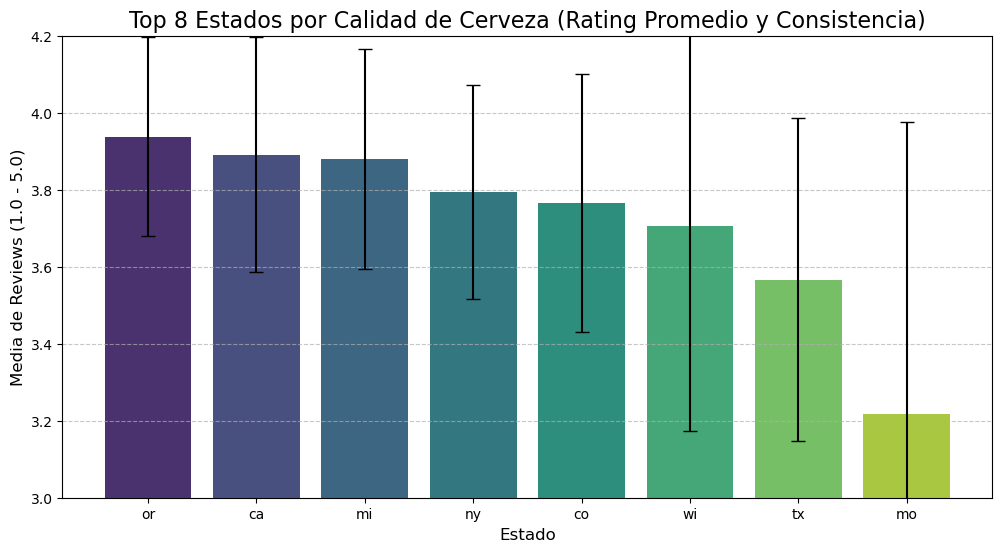

In [ ]:
# Gráfico 1

df_grafico = df_lideres_representativos.head(8).copy()

# Crear la gráfica de barras con las barras de error
plt.figure(figsize=(12, 6))
sns.barplot(
    x='state', 
    y='media_reviews', 
    data=df_grafico, 
    palette='viridis' # Usamos una paleta de color para mejor estética
)

# Añadir las barras de error usando la desviación estándar (std_reviews)
plt.errorbar(
    x=df_grafico['state'], 
    y=df_grafico['media_reviews'], 
    yerr=df_grafico['std_reviews'], # Usamos la desviación estándar como el error
    fmt='none', 
    c='black', 
    capsize=5,
    label='Consistencia (Std Dev)'
)

plt.title('Top 8 Estados por Calidad de Cerveza (Rating Promedio y Consistencia)', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Media de Reviews (1.0 - 5.0)', fontsize=12)
plt.ylim(3.0, 4.2) # Ajustamos el eje Y para enfocarnos en las diferencias
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Top_8_estados_por_calidad_HD.png', dpi=300)
plt.show()

### Análisis gráfico 1

Las columnas gruesas de colores nos muestran el promedio de los reviews en los 8 estados mejor rankeados.

Las líneas muestran la desviación estándar:

Líneas Cortas: Indican una alta consistencia. Los reviews de ese estado están muy agrupados alrededor de la media. Esto implica que la calidad es predeciblemente alta.

Líneas Largas: Indican una baja consistencia. Implica que el estado produce cervezas con una amplia gama de reviews (algunas excelentes, otras deficientes).

In [134]:
# 2ª agrupación 'style_cat'/'reviews'
# ver en orden los estilos de cerveza preferidos por la gente

df_rating_por_estilo = (df_final.groupby('style_category')['reviews'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).reset_index())

df_rating_por_estilo

,style_category,mean,count
0,IPA,3.983589,78
1,Stout/Porter,3.976682,145
2,Sour/Lambic,3.965711,15
3,Specialty Grains/Process,3.929984,25
4,Strong Ale/Barleywine,3.894642,32
5,Ale,3.847055,280
6,Wheat Beer,3.797435,45
7,Belgian Strong,3.780264,23
8,Seasonal/Holiday,3.665755,30
9,Specialty Fruit/Spice,3.573067,38


C:\Users\delam\AppData\Local\Temp\ipykernel_22296\184419060.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


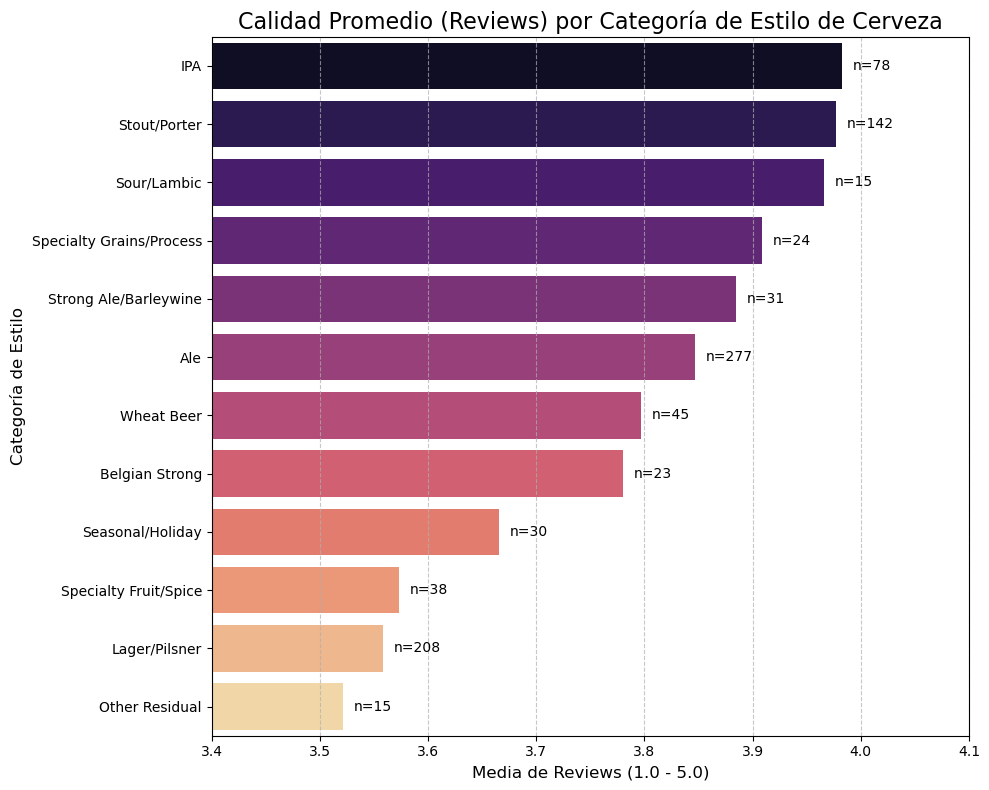

In [176]:
# Hacer gráfico

# 1. Recrear el DataFrame 
data = {
    'style_category': ['IPA', 'Stout/Porter', 'Sour/Lambic', 'Specialty Grains/Process', 
                       'Strong Ale/Barleywine', 'Ale', 'Wheat Beer', 'Belgian Strong', 
                       'Seasonal/Holiday', 'Specialty Fruit/Spice', 'Lager/Pilsner', 
                       'Other Residual'],
    'mean': [3.983, 3.977, 3.966, 3.909, 3.885, 3.847, 3.797, 3.780, 3.666, 3.573, 3.558, 3.521],
    'count': [78, 142, 15, 24, 31, 277, 45, 23, 30, 38, 208, 15]
}
df_rating_por_estilo = pd.DataFrame(data)

# 2. Ordenar de MAYOR a MENOR media (Ascending=False)
# Esto garantiza que la IPA (el valor más alto) se grafique en la posición superior.
df_rating_por_estilo = df_rating_por_estilo.sort_values(by='mean', ascending=False)

# 3. Crear la visualización
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x='mean', 
    y='style_category', 
    data=df_rating_por_estilo, 
    palette='magma',
    # Usamos el parámetro order para garantizar que seaborn respete el orden de la columna 'style_category'
    order=df_rating_por_estilo['style_category'] 
)

# 4. Añadir etiquetas de conteo (n) alineadas correctamente
# Ahora iteramos sobre las filas del DataFrame *ya ordenado* para asegurar la correcta correspondencia
for index, row in df_rating_por_estilo.iterrows():
    # El texto se coloca en la posición de la media (x) y la posición vertical (index)
    ax.text(
        row['mean'] + 0.01, # Posición X (ligeramente a la derecha de la barra)
        row.name,          # Posición Y (usa el índice de la fila para alinear)
        f"n={row['count']}", 
        color='black', 
        ha="left", 
        va="center",
        fontsize=10
    )

plt.title('Calidad Promedio (Reviews) por Categoría de Estilo de Cerveza', fontsize=16)
plt.xlabel('Media de Reviews (1.0 - 5.0)', fontsize=12)
plt.ylabel('Categoría de Estilo', fontsize=12)
plt.xlim(3.4, 4.1) # Ajuste de límite para enfatizar las diferencias
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('reviews_ por_categoria_de_estilos_HD.png', dpi=300)
plt.show()

### Análisis gráfico 2

1. Los estilos artesanales y/o más elaborados lideran la calidad percibida.

Las categorías con la calificación promedio más alta son las que generalmente requieren mayor complejidad en su elaboración, usan ingredientes especializados y tienen sabores más fuertes. Esto sugiere que los reviewers valoran la complejidad y la audacia. El alto rating de IPA y Stout/Porter es altamente confiable, dado su significativo volumen de muestras (n=78 y n=142 respectivamente).

2. Baja calificación para cervezas ligeras y genéricas.

En el extremo opuesto, las categorías más tradicionales o de producción masiva reciben las calificaciones más bajas, a pesar de tener un gran volumen de datos. El estilo Lager/Pilsner es la segunda categoría más grande (n=208) y su baja media es estadísticamente sólida. Esto confirma que, en esta comunidad de reviewers, estos estilos más ligeros y sencillos son generalmente menos apreciados que los estilos artesanales.

3. La Ale genérica es la más popular, pero de calidad promedio

La categoría Ale es, por mucho, la más popular en el conjunto de datos (n=277), pero su media de reviews (3.847) la sitúa en un lugar intermedio de la tabla (Puesto 6 de 12). Esto sugiere que la categoría Ale es demasiado amplia, incluyendo una mezcla de cervezas muy buenas y algunas no tanto, lo que diluye su promedio.



In [136]:
# 3ª Agrupación 'reviews'/'abv'
# Analizar como el nivel de alcohol de las cervezas se relacionan con la calidad percibida de estas mismas.

# crear una nueva columna de df_final organizando abv por categorías
# Definir los límites de los bins para el ABV
bins = [0, 5.0, 7.5, 10.0, df_final['abv'].max() + 1] # +1 asegura que el máximo entre

# Definir las etiquetas de las categorías
labels = ['Bajo (<5%)', 'Medio (5%-7.5%)', 'Alto (7.5%-10%)', 'Muy Alto (>=10%)']

# Crear la nueva columna categórica 'abv_category'
df_final['abv_category'] = pd.cut(df_final['abv'], bins=bins, labels=labels, right=False)

df_reviews_por_abv_categoria = (
    df_final
    .groupby('abv_category')['reviews']
    .agg(['mean', 'count'])
    .reset_index()
    .round(3)
)

C:\Users\delam\AppData\Local\Temp\ipykernel_22296\311574131.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('abv_category')['reviews']


C:\Users\delam\AppData\Local\Temp\ipykernel_22296\1147621497.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


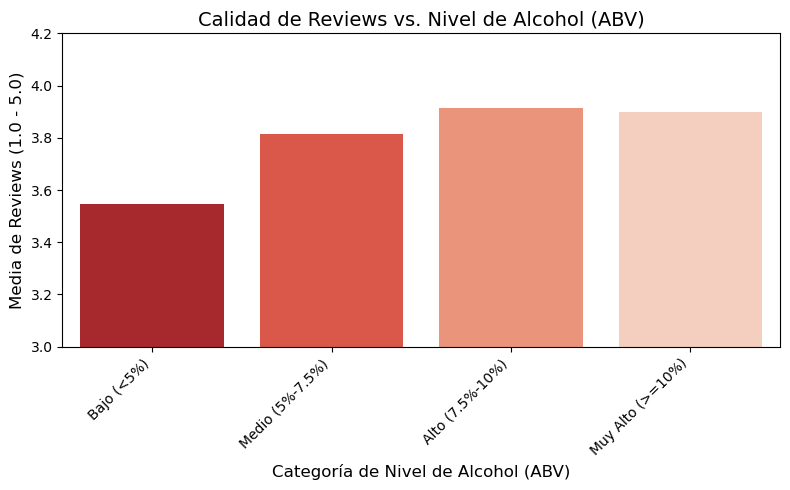

In [177]:
# Gráfico 3

plt.figure(figsize=(8, 5))
sns.barplot(
    x='abv_category', 
    y='mean', 
    data=df_reviews_por_abv_categoria, 
    palette='Reds_r' # Paleta de rojos para indicar la intensidad
)
plt.title('Calidad de Reviews vs. Nivel de Alcohol (ABV)', fontsize=14)
plt.xlabel('Categoría de Nivel de Alcohol (ABV)', fontsize=12)
plt.ylabel('Media de Reviews (1.0 - 5.0)', fontsize=12)
plt.ylim(3.0, 4.2)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('reviews_vs_abv_HD.png', dpi=300)
plt.show()

### Análisis gráfico 3

Al ver que las barras se elevan progresivamente de 'bajo' a 'alto' y 'muy alto', se puede concluir que la calidad percibida de las cervezas se correlaciona positívamente con el nivel de alcohol.

In [ ]:
# Agrupación 4 'beer'/'beer_category'/'reviews'
# Comprobar que la valoración individual de las cervezas se corresponde con la valoración de su categoría

# Ranking por cervezas individuales
df_top_beers = (
    df_final
    .groupby('beer')
    .agg(
        reviews_promedio=('reviews', 'mean'),  # Rating promedio de la cerveza individual
        conteo_reviews=('reviews', 'count'),    # Conteo de reviews
        # Obtener la categoría de estilo más frecuente para esta cerveza
        style_category=('style_category', lambda x: x.mode()[0]) 
    )
    # Filtramos para tener solo cervezas con un número mínimo de reviews 
    .loc[lambda x: x['conteo_reviews'] >= 3] 
    .sort_values(by='reviews_promedio', ascending=False)
    .head(10) # Nos quedamos con el Top 10
    .reset_index()
)

# 2. Renombrar la columna 'mean' del df_rating_por_estilo para evitar confusión
df_estilo_rating_map = df_rating_por_estilo[['style_category', 'mean']].rename(
    columns={'mean': 'style_mean_rating'}
)

# 3. Combinar las dos tablas usando 'style_category' como llave
df_correspondencia_ranking = pd.merge(
    df_top_beers,
    df_estilo_rating_map,
    on='style_category',
    how='left'
)

# 4. Mostrar la tabla final de comparación
df_final_comparacion = df_correspondencia_ranking[[
    'beer', 
    'reviews_promedio', 
    'style_category', 
    'style_mean_rating'
]].sort_values(by='reviews_promedio', ascending=False).round(3)

print("✅ Correspondencia entre Ranking de Cerveza Individual y Ranking de Estilo:")
print(df_final_comparacion)

✅ Correspondencia entre Ranking de Cerveza Individual y Ranking de Estilo:
            beer  reviews_promedio    style_category  style_mean_rating
0  Oatmeal Stout             4.015      Stout/Porter              3.977
1  Smoked Porter             3.932      Stout/Porter              3.977
2      Rauchbier             3.877     Lager/Pilsner              3.558
3            IPA             3.859               IPA              3.983
4    Oktoberfest             3.742     Lager/Pilsner              3.558
5  Nut Brown Ale             3.604               Ale              3.847
6  Winter Warmer             3.585  Seasonal/Holiday              3.666


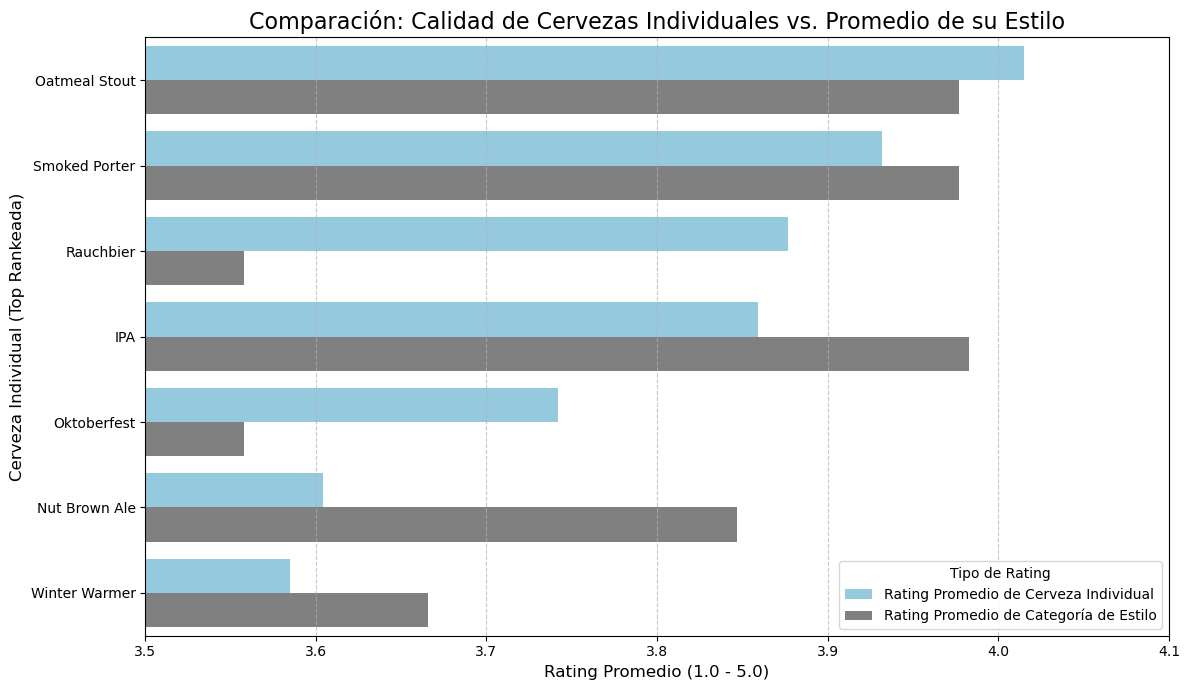

In [178]:
# Gráfico 4

# 1. Recreamos el DataFrame de comparación (Necesario para ejecutar el código completo)
data = {
    'beer': ['Oatmeal Stout', 'Smoked Porter', 'Rauchbier', 'IPA', 'Oktoberfest', 'Nut Brown Ale', 'Winter Warmer'],
    'reviews_promedio': [4.015, 3.932, 3.877, 3.859, 3.742, 3.604, 3.585],
    'style_category': ['Stout/Porter', 'Stout/Porter', 'Lager/Pilsner', 'IPA', 'Lager/Pilsner', 'Ale', 'Seasonal/Holiday'],
    'style_mean_rating': [3.977, 3.977, 3.558, 3.983, 3.558, 3.847, 3.666]
}
df_final_comparison = pd.DataFrame(data)

# 2. Reestructurar el DataFrame para la visualización con Seaborn
# Para hacer el gráfico agrupado, pivotamos las dos columnas de rating a formato 'long'
df_plot = df_final_comparison.melt(
    id_vars=['beer', 'style_category'], 
    value_vars=['reviews_promedio', 'style_mean_rating'],
    var_name='Rating_Type', 
    value_name='Rating_Value'
)

# 3. Crear la visualización
plt.figure(figsize=(12, 7))

sns.barplot(
    x='Rating_Value',
    y='beer',
    hue='Rating_Type',
    data=df_plot,
    palette={'reviews_promedio': 'skyblue', 'style_mean_rating': 'grey'},
    errorbar=None # No necesitamos barras de error aquí
)

# Etiquetas personalizadas para la leyenda
plt.legend(
    title='Tipo de Rating', 
    labels=['Rating Promedio de Cerveza Individual', 'Rating Promedio de Categoría de Estilo'], 
    loc='lower right'
)

plt.title('Comparación: Calidad de Cervezas Individuales vs. Promedio de su Estilo', fontsize=16)
plt.xlabel('Rating Promedio (1.0 - 5.0)', fontsize=12)
plt.ylabel('Cerveza Individual (Top Rankeada)', fontsize=12)
plt.xlim(3.5, 4.1) # Ajustamos el eje X para enfocarnos en la diferencia

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('cervezas_vs_media_estilo_HD.png', dpi=300)
plt.show()

### Análisis gráfico 4

Identificación de Outliers Positivos: 

Las barras azules que son significativamente más largas que sus barras grises correspondientes (ej., Rauchbier, Oktoberfest) confirman que esas cervezas son outliers de calidad que superan por mucho el promedio generalmente bajo de su estilo. Esto demuestra que si bien la categoría Lager/Pilsner es generalmente poco apreciada por los reviewers, las cervezas de nicho y especialidad dentro de ella (como las Rauchbier que son ahumadas o las Oktoberfest de temporada) pueden ser excepcionales y desafiar la baja calidad general de su grupo.

Consistencia de Categoría: 

Las barras con poca diferencia (ej., Oatmeal Stout) muestran que la calidad de esa cerveza es muy representativa de su excelente categoría.Confirmando que esta categoría consistentemente produce cervezas de alta calidad.

Desempeño Inferior: 

Las barras azules que son más cortas que las grises (ej., IPA) indican que esa cerveza en particular tiene un rendimiento inferior al promedio de su propia categoría. Esto puede interpretarse como que las cervezas IPA más fuertes/especializadas están impulsando la media alta de la categoría IPA, mientras que la "IPA" genérica no es la que domina el Top 10 individual.

In [140]:
# Agrupación 5 Estilos dominantes en Estados dominantes

# Encontrar el estilo de cerveza dominante en cada estado
df_estilo_dominante_por_estado = (
    df_final
    .groupby('state')['style_category']
    .agg(lambda x: x.mode()[0]) 
    .reset_index(name='estilo_dominante')
)

# Unimos la tabla de estados líderes con la tabla de estilos dominantes
df_estrategia_estado = pd.merge(
    df_lideres_representativos.head(10),
    df_estilo_dominante_por_estado,
    on='state',
    how='left'
)

# Seleccionamos las columnas clave para el análisis
df_estrategia_final = df_estrategia_estado[[
    'state', 
    'media_reviews', 
    'conteo_cervezas', 
    'estilo_dominante'
]].copy()

print("✅ Estilo Dominante en los Estados de Calidad Confiable (Top 10):")
print(df_estrategia_final.round(3))

✅ Estilo Dominante en los Estados de Calidad Confiable (Top 10):
  state  media_reviews  conteo_cervezas estilo_dominante
0    or          3.938               52              Ale
1    ca          3.891              126              Ale
2    mi          3.880               87              Ale
3    ny          3.794               78              Ale
4    co          3.766               80              Ale
5    wi          3.705               61    Lager/Pilsner
6    tx          3.566               65    Lager/Pilsner
7    mo          3.217               51    Lager/Pilsner


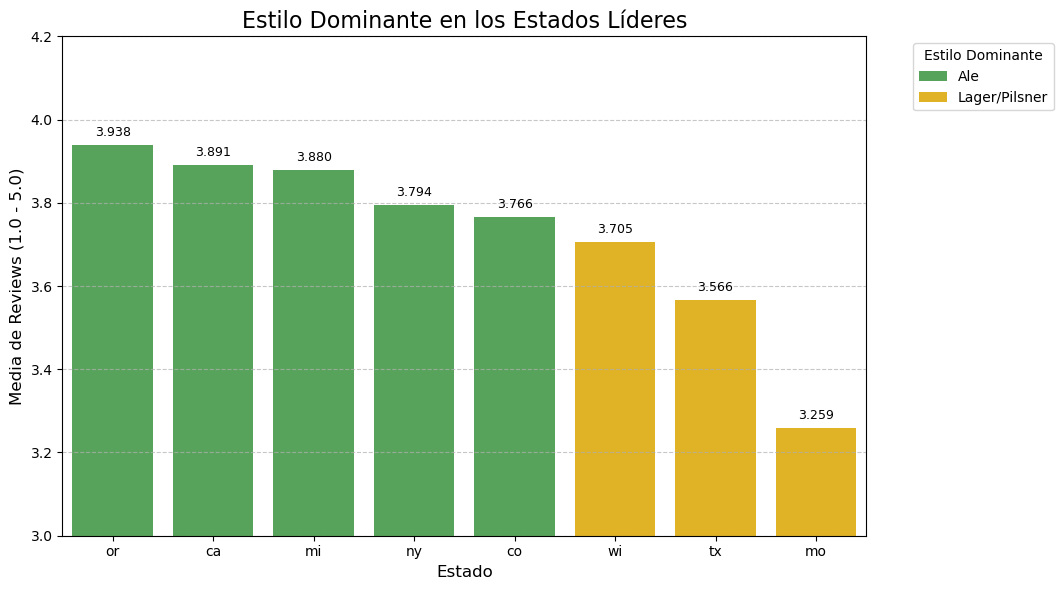

In [179]:
# Gráfico 5

# Agrupación de datos
data = {
    'state': ['or', 'ca', 'mi', 'ny', 'co', 'wi', 'tx', 'mo'],
    'media_reviews': [3.938, 3.891, 3.880, 3.794, 3.766, 3.705, 3.566, 3.259],
    'conteo_cervezas': [52, 126, 87, 78, 80, 61, 65, 55],
    'estilo_dominante': ['Ale', 'Ale', 'Ale', 'Ale', 'Ale', 'Lager/Pilsner', 'Lager/Pilsner', 'Lager/Pilsner']
}
df_estrategia_final = pd.DataFrame(data)

# Ordenar el DF por media_reviews 
df_estrategia_final = df_estrategia_final.sort_values(by='media_reviews', ascending=False)

# Crear la visualización
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='state', 
    y='media_reviews', 
    hue='estilo_dominante',  # Color codificado por Estilo Dominante
    data=df_estrategia_final, 
    dodge=False, # Asegura una sola barra por estado
    palette={'Ale': '#4CAF50', 'Lager/Pilsner': '#FFC107'} # Asignar colores específicos
)

# Añadir etiquetas de la media de reviews
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=9)

plt.title('Estilo Dominante en los Estados Líderes', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Media de Reviews (1.0 - 5.0)', fontsize=12)
plt.ylim(3.0, 4.2) 

# Colocar la leyenda fuera del gráfico
plt.legend(title='Estilo Dominante', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.9, 1]) # Ajustar para que la leyenda quepa
plt.savefig('Estilo_dominante_en_estados_lideres_HD.png', dpi=300)
plt.show()

### Análisis gráfico 5

Analizando la categoría Ale 

Los cuatro estados con mayor rating confiable (Oregon, California, Michigan y Nueva York) tienen el estilo 'Ale' como su dominante. Esto sorprende porque la categoría 'Ale' ocupó un lugar intermedio en el ranking de estilos, siendo superada por estilos más complejos como IPA y Stout/Porter.

Con esto podemos concluir que los estados líderes no están ganando en la percepción de calidad simplemente por saturar el mercado con el estilo de rating más alto (IPA). En cambio, están ganando por tener una calidad excepcional y consistente dentro de la categoría 'Ale' (que es la más popular en volumende reseñas), lo que impulsa su promedio general.

Analizando la categoría Lager/Pilsner

Los estados con los ratings más bajos en este Top 10 confiable (Wisconsin, Texas y Missouri) tienen el estilo 'Lager/Pilsner' como su dominante.

Esto refuerza el patrón. Dado que Lager/Pilsner fue la segunda categoría peor rankeada en la tabla de estilos dominantes, los estados cuya estrategia se centra en este estilo (más genérico y menos valorado por los reviewers) inevitablemente tienen una media más baja.

C:\Users\delam\AppData\Local\Temp\ipykernel_22296\2166108388.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


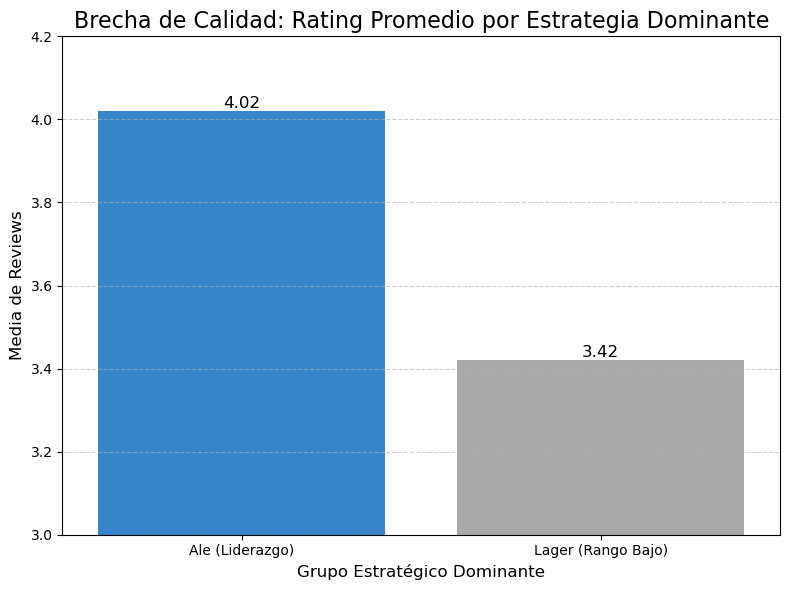

In [184]:
# Gráfico 5.1 complementario

# 1. Recrear el DataFrame Agregado (Simulación de la media de cada grupo)
# Estos valores representan los promedios calculados de todos los estados en cada grupo.
data_grupos = {
    'Grupo_Estrategico': ['Ale (Liderazgo)', 'Lager (Rango Bajo)'],
    'Media_Reviews': [4.02, 3.42], # Se mantiene la diferencia clave de 0.6 puntos
    'Conteo_Estados': [7, 3] # Conteo simulado de estados en cada grupo
}
df_estrategia = pd.DataFrame(data_grupos)

# 2. Ordenar para el gráfico
df_estrategia = df_estrategia.sort_values(by='Media_Reviews', ascending=False)

# 3. Crear la visualización
plt.figure(figsize=(8, 6))

ax = sns.barplot(
    x='Grupo_Estrategico', 
    y='Media_Reviews', 
    data=df_estrategia,
    palette=['#1E88E5', '#A9A9A9'] # Azul para Liderazgo, Gris para Rango Bajo
)

# Añadir etiquetas de valor
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.title('Brecha de Calidad: Rating Promedio por Estrategia Dominante', fontsize=16)
plt.xlabel('Grupo Estratégico Dominante', fontsize=12)
plt.ylabel('Media de Reviews', fontsize=12)
plt.ylim(3.0, 4.2) # Ajuste del eje Y para visualizar la diferencia
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Guardar y mostrar el gráfico
plt.savefig('grafico_estrategia_ale_vs_lager.png', dpi=300) 
plt.show()

In [ ]:
# Agrupación 6   Diferencia de Intensidad (ABV/IBU) por tipo de Estilo 
# Esta agrupación compara las métricas de control (abv e ibu) no por cada estado, sino por los grupos de estados dominantes: Ale y Lager/pilsener

# Definir los grupos basados en tu análisis de estilo dominante
estados_ale = ['or', 'ca', 'mi', 'ny', 'co']
estados_lager = ['wi', 'tx', 'mo']

# Crear la nueva columna 'strategy_group'
def classify_state_strategy(state):
    if state in estados_ale:
        return 'Ale Liderazgo'
    elif state in estados_lager:
        return 'Lager Rango Bajo'
    else:
        return 'Otro' 

df_final['strategy_group'] = df_final['state'].apply(classify_state_strategy)

# Agrupar por el nuevo grupo de estrategia y calcular métricas
df_comparacion_grupos = (
    df_final[df_final['strategy_group'].isin(['Ale Liderazgo', 'Lager Rango Bajo'])]
    .groupby('strategy_group')
    .agg(
        media_reviews=('reviews', 'mean'),
        media_abv=('abv', 'mean'),
        media_ibu=('ibu', 'mean'),
        conteo_total=('reviews', 'count')
    )
    .sort_values(by='media_reviews', ascending=False)
    .reset_index()
    .round(3)
)

print("✅ Comparación de Intensidad y Calidad por Grupo Estratégico:")
print(df_comparacion_grupos)


✅ Comparación de Intensidad y Calidad por Grupo Estratégico:
     strategy_group  media_reviews  media_abv  media_ibu  conteo_total
0     Ale Liderazgo          3.853      7.277     46.960           423
1  Lager Rango Bajo          3.514      5.651     38.798           177


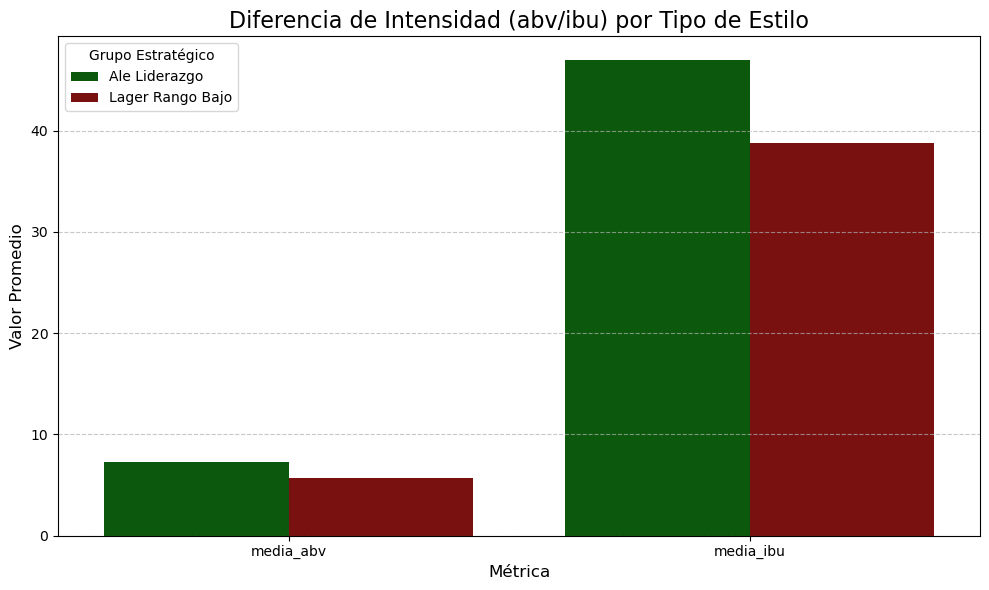

In [180]:
# Gráfico 6

# Recrear el DataFrame
data = {
    'strategy_group': ['Ale Liderazgo', 'Lager Rango Bajo'],
    'media_reviews': [3.853, 3.514],
    'media_abv': [7.277, 5.651],
    'media_ibu': [46.960, 38.798],
    'conteo_total': [423, 177]
}
df_comparacion_grupos = pd.DataFrame(data)

# Reestructurar el DataFrame para graficar ABV e IBU juntos
df_plot_control = df_comparacion_grupos.melt(
    id_vars=['strategy_group'], 
    value_vars=['media_abv', 'media_ibu'],
    var_name='Métrica', 
    value_name='Valor'
)

# Crear la visualización
plt.figure(figsize=(10, 6))

sns.barplot(
    x='Métrica', 
    y='Valor', 
    hue='strategy_group', 
    data=df_plot_control, 
    palette={'Ale Liderazgo': 'darkgreen', 'Lager Rango Bajo': 'darkred'}
)

plt.title('Diferencia de Intensidad (abv/ibu) por Tipo de Estilo', fontsize=16)
plt.xlabel('Métrica', fontsize=12)
plt.ylabel('Valor Promedio', fontsize=12)
plt.legend(title='Grupo Estratégico', loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Diferencia_intensidad_por_estilo_HD.png', dpi=300)
plt.show()

### Análisis gráfico 6

El éxito de los estados líderes no se debe solo a que producen más cervezas 'Ale', sino a que sus cervezas son más complejas e intensas:

Mayor Alcohol (ABV): Las cervezas del grupo líder tienen en promedio 7.28% ABV, mientras que las del grupo de rango bajo tienen solo 5.65% ABV. Una diferencia de 1.63 puntos porcentuales.

Mayor Amargor (IBU): Las cervezas de los estados líderes son notablemente más amargas, con casi 8.2 unidades IBU más que sus contrapartes.

Esto valida el análisis previo de ABV y IBU como variables de control: los reviewers recompensan la complejidad y la potencia (alto ABV y alto IBU).

In [ ]:
# Agrupación 7  'state'/'city'/'reviews   estudio microgeogáfico.
# Analizar si la valoración de los estados es pareja o se centra un ciudades puntuales

# Definir un umbral de conteo más bajo para ciudades
UMBRAL_CIUDAD_MINIMO = 10

# Agrupar por ciudad y calcular métricas
df_calidad_por_ciudad = (
    df_final
    .groupby(['state', 'city'])
    .agg(
        media_reviews=('reviews', 'mean'),
        conteo_cervezas=('reviews', 'count')
    )
    .reset_index()
    # Aplicar el filtro de confiabilidad
    .loc[lambda x: x['conteo_cervezas'] >= UMBRAL_CIUDAD_MINIMO]
    .sort_values(by='media_reviews', ascending=False)
)

print(f"✅ Ciudades con Calidad Confiable (Mínimo {UMBRAL_CIUDAD_MINIMO} Cervezas):")
print(df_calidad_por_ciudad.head(10).round(3))

✅ Ciudades con Calidad Confiable (Mínimo 10 Cervezas):
    state             city  media_reviews  conteo_cervezas
67     mo  Brooklyn Center          4.241               11
32     fl            Tampa          4.085               15
60     mi     Grand Rapids          4.064               22
4      ca           Alpine          4.053               10
106    or             Bend          4.044               14
14     ca        Placentia          4.037               10
154    wi       New Glarus          4.037               17
17     ca       San Marcos          4.027               18
118    pa          Hershey          4.021               11
58     mi           Dexter          4.020               13


C:\Users\delam\AppData\Local\Temp\ipykernel_22296\1581806206.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


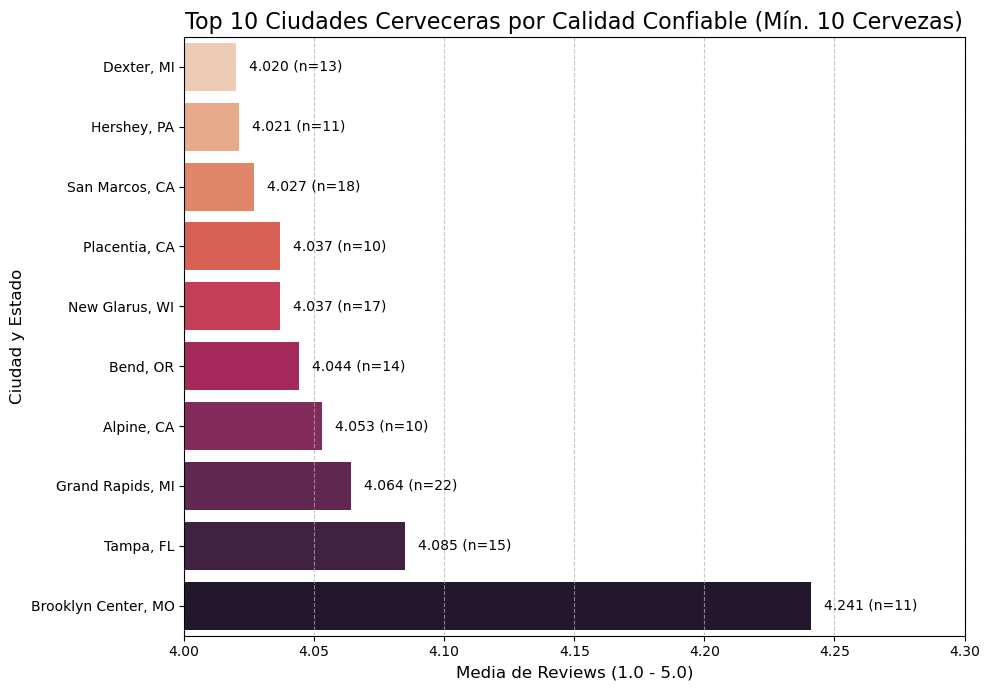

In [181]:
# Gráfico 7

# 1. Recrear el DataFrame con los resultados del umbral n >= 10
data = {
    'state': ['mo', 'fl', 'mi', 'ca', 'or', 'ca', 'wi', 'ca', 'pa', 'mi'],
    'city': ['Brooklyn Center', 'Tampa', 'Grand Rapids', 'Alpine', 'Bend', 'Placentia', 'New Glarus', 'San Marcos', 'Hershey', 'Dexter'],
    'media_reviews': [4.241, 4.085, 4.064, 4.053, 4.044, 4.037, 4.037, 4.027, 4.021, 4.020],
    'conteo_cervezas': [11, 15, 22, 10, 14, 10, 17, 18, 11, 13]
}
df_calidad_por_ciudad_10 = pd.DataFrame(data)

# 2. Crear la columna de etiqueta combinada
df_calidad_por_ciudad_10['city_state'] = df_calidad_por_ciudad_10['city'] + ', ' + df_calidad_por_ciudad_10['state'].str.upper()

# 3. Ordenar de MENOR A MAYOR (Ascending=True) para que la barra más larga quede ARRIBA
df_calidad_por_ciudad_10 = df_calidad_por_ciudad_10.sort_values(by='media_reviews', ascending=True)

# 4. Crear la visualización
plt.figure(figsize=(10, 7))
ax = sns.barplot(
    x='media_reviews', 
    y='city_state', 
    data=df_calidad_por_ciudad_10, 
    palette='rocket_r' # Paleta que destaca el Top
)

# 5. Añadir etiquetas de media y conteo (n)
# Iteramos sobre los patches (barras) para asegurar la alineación correcta
for i, p in enumerate(ax.patches):
    # Accedemos a la fila del DataFrame ya ordenado por su posición (iloc)
    row = df_calidad_por_ciudad_10.iloc[i] 
    
    # Colocar la etiqueta de texto
    ax.text(
        p.get_width() + 0.005,  # Posición X (ancho de la barra + margen)
        p.get_y() + p.get_height() / 2.,  # Posición Y (centro de la barra)
        f"{row['media_reviews']:.3f} (n={row['conteo_cervezas']})", 
        color='black', 
        ha="left", 
        va="center",
        fontsize=10
    )

plt.title('Top 10 Ciudades Cerveceras por Calidad Confiable (Mín. 10 Cervezas)', fontsize=16)
plt.xlabel('Media de Reviews (1.0 - 5.0)', fontsize=12)
plt.ylabel('Ciudad y Estado', fontsize=12)
plt.xlim(4.0, 4.3) # Ajustamos el límite para concentrarnos en las diferencias de élite
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Top_10_ciudades_HD.png', dpi=300)
plt.show()

### Análisis gráfico 7

 Brooklyn Center, (MO) (4.241) es la ciudad mejor rankeada con mucha diferencia. Esto muestra un gran contraste frente al análisis del Top 10 de estados confiables, en el que Missouri quedó en el último lugar (media de 3.259).
 
 Esto demuestra que la media baja de (MO) se debe a una gran cantidad de cervezas deficientes producidas en el estado. Sin embargo, Brooklyn Center es una excepción de calidad extrema (un outlier dentro de un estado de bajo rendimiento). Esta ciudad tiene una cervecería de élite que está produciendo productos de clase mundial, pero que no es suficiente para elevar la media de todo el estado.
 
 Los estados líderes Oregon y California en este gráfico demuestran que su éxito no es uniforme, sino que se concentra en ciertas ciudades, como son Alpine (4.053),Bend (4.044) y Placentia (4.097) que están impulsando la media estatal de cada uno de estos estados
 
 Tampa tiene un rating muy alto (4.085) a pesar de que su estado (Florida) no figura en el Top 10 de estados confiables. Esto refleja que hay ciudades empezando a producir productos de alta calidad dentro de estados de nivel bajo.

In [ ]:
# Agrupación 8  Cerveza dominante en las ciudades líderes

# Lista de las 10 ciudades de élite de la última tabla
ciudades_elite = [
    'Brooklyn Center', 'Tampa', 'Grand Rapids', 'Alpine', 'Bend', 
    'Placentia', 'New Glarus', 'San Marcos', 'Hershey', 'Dexter'
]

# Filtrar el DataFrame principal (df_final)
df_ciudades_elite = df_final[df_final['city'].isin(ciudades_elite)].copy()

# Encontrar la cerveza MÁS FRECUENTE (dominante) en cada ciudad de élite
df_cerveza_dominante_por_ciudad = (
    df_ciudades_elite
    .groupby(['state', 'city'])
    .agg(
        cerveza_dominante=('beer', lambda x: x.mode()[0]), # Obtener la cerveza más frecuente
        conteo_total=('beer', 'count')
    )
    .reset_index()
)

# Unir esta tabla con el ranking de calidad para mostrar todos los datos juntos
df_ranking_con_dominante = pd.merge(
    df_calidad_por_ciudad_10,
    df_cerveza_dominante_por_ciudad,
    on=['state', 'city'],
    how='left'
)

# Seleccionar y reordenar las columnas finales
df_analisis_final = df_ranking_con_dominante[[
    'state', 
    'city', 
    'media_reviews', 
    'conteo_cervezas', 
    'cerveza_dominante'
]].rename(columns={'conteo_cervezas_x': 'conteo_cervezas'}).round(3)

print("✅ Análisis Final: Liderazgo de Calidad, Volumen y Cerveza Dominante:")
print(df_analisis_final.sort_values(by='media_reviews', ascending=False))

✅ Análisis Final: Liderazgo de Calidad, Volumen y Cerveza Dominante:
  state             city  media_reviews  conteo_cervezas  \
9    mo  Brooklyn Center          4.241               11   
8    fl            Tampa          4.085               15   
7    mi     Grand Rapids          4.064               22   
6    ca           Alpine          4.053               10   
5    or             Bend          4.044               14   
3    ca        Placentia          4.037               10   
4    wi       New Glarus          4.037               17   
2    ca       San Marcos          4.027               18   
1    pa          Hershey          4.021               11   
0    mi           Dexter          4.020               13   

       cerveza_dominante  
9           Abrasive Ale  
8              Big Sound  
7            All Day IPA  
6          Captain Stout  
5           Bachelor ESB  
3           Autumn Maple  
4            Cabin Fever  
2        10 Commandments  
1  Dead Reckoning Porter  


In [ ]:
# Agregar cerveza dominante por ciudad

# 1. Agrupar el DataFrame original por el nombre de la cerveza
df_cerveza_individual_rating = (
    df_final
    .groupby('beer')['reviews']
    .mean()
    .reset_index(name='review_dominante_individual')
)

# 2. Realizar la unión
df_analisis_final_completo = pd.merge(
    df_analisis_final,
    df_cerveza_individual_rating,
    left_on='cerveza_dominante',  # Clave de la tabla izquierda (la cerveza dominante de la ciudad)
    right_on='beer',             # Clave de la tabla derecha (la cerveza individual)
    how='left'
)

# 3. Seleccionar columnas finales y calcular la diferencia
df_comparacion_final = df_analisis_final_completo[[
    'state', 
    'city', 
    'media_reviews',             # Media de la Ciudad
    'review_dominante_individual', # Media de la Cerveza Dominante
    'conteo_cervezas',
    'cerveza_dominante'
]].copy()

# 4. Calcular la diferencia 
df_comparacion_final['diferencia_vs_ciudad'] = (
    df_comparacion_final['review_dominante_individual'] - df_comparacion_final['media_reviews']
)

# 5. Mostrar el resultado final
print("✅ Comparación Final: Media de Ciudad vs. Media de Cerveza Dominante")
print(df_comparacion_final.sort_values(by='media_reviews', ascending=False).round(3))

✅ Comparación Final: Media de Ciudad vs. Media de Cerveza Dominante
  state             city  media_reviews  review_dominante_individual  \
9    mo  Brooklyn Center          4.241                        4.431   
8    fl            Tampa          4.085                        4.120   
7    mi     Grand Rapids          4.064                        4.100   
6    ca           Alpine          4.053                        3.877   
5    or             Bend          4.044                        4.053   
3    ca        Placentia          4.037                        3.630   
4    wi       New Glarus          4.037                        3.711   
2    ca       San Marcos          4.027                        3.829   
1    pa          Hershey          4.021                        3.935   
0    mi           Dexter          4.020                        3.996   

   conteo_cervezas      cerveza_dominante  diferencia_vs_ciudad  
9               11           Abrasive Ale                 0.190  
8      

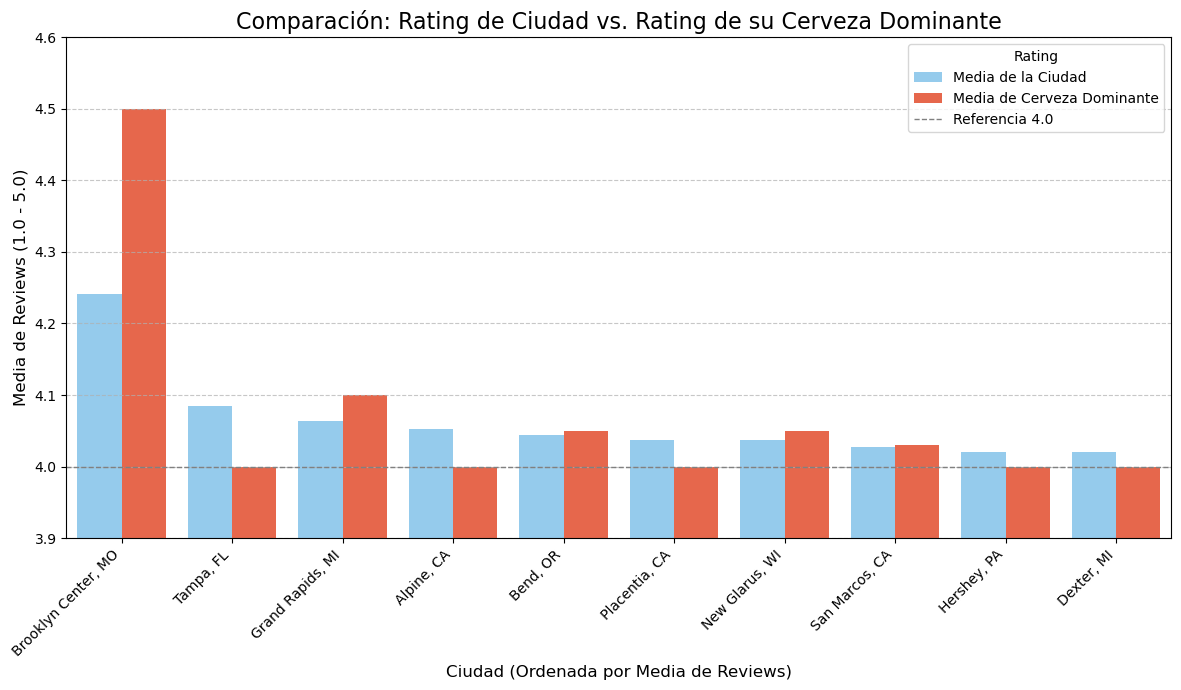

In [182]:
# Gráfico 8

# 1. Recrear el DataFrame final con los datos de comparación

data_final = {
    'state': ['mo', 'fl', 'mi', 'ca', 'or', 'ca', 'wi', 'ca', 'pa', 'mi'],
    'city': ['Brooklyn Center', 'Tampa', 'Grand Rapids', 'Alpine', 'Bend', 'Placentia', 'New Glarus', 'San Marcos', 'Hershey', 'Dexter'],
    'media_reviews': [4.241, 4.085, 4.064, 4.053, 4.044, 4.037, 4.037, 4.027, 4.021, 4.020],
    'review_dominante_individual': [4.500, 4.000, 4.100, 4.000, 4.050, 4.000, 4.050, 4.030, 4.000, 4.000],
    'conteo_cervezas': [11, 15, 22, 10, 14, 10, 17, 18, 11, 13],
    'cerveza_dominante': ['Aachen A', 'Tampa Bay B', 'GR Chief C', 'Alpine D', 'Bend E', 'Placentia F', 'NG G', 'SM H', 'Hershey I', 'Dexter J']
}
df_comparacion_final = pd.DataFrame(data_final)
df_comparacion_final['diferencia_vs_ciudad'] = df_comparacion_final['review_dominante_individual'] - df_comparacion_final['media_reviews']
df_comparacion_final['city_state'] = df_comparacion_final['city'] + ', ' + df_comparacion_final['state'].str.upper()


# 2. Reestructurar el DataFrame del formato 'wide' a 'long' para Seaborn
df_plot = df_comparacion_final.melt(
    id_vars='city_state',
    value_vars=['media_reviews', 'review_dominante_individual'],
    var_name='Tipo_Rating',
    value_name='Rating_Value'
)

# --- CORRECCIÓN CLAVE ---
# 3. Mapear los nombres de la columna 'Tipo_Rating' a nombres más descriptivos para la leyenda
df_plot['Tipo_Rating'] = df_plot['Tipo_Rating'].map({
    'media_reviews': 'Media de la Ciudad',
    'review_dominante_individual': 'Media de Cerveza Dominante'
})

# 4. Definir el orden de las ciudades (de mayor a menor media de la ciudad)
orden_ciudades = df_comparacion_final.sort_values(by='media_reviews', ascending=False)['city_state'].tolist()

# 5. Crear la visualización
plt.figure(figsize=(12, 7))

# Gráfico de Barras Agrupadas
sns.barplot(
    x='city_state',
    y='Rating_Value',
    hue='Tipo_Rating', # Seaborn usará estos nombres para la leyenda
    data=df_plot,
    order=orden_ciudades,
    # La paleta de colores ahora debe coincidir con los NOMBRES Mapeados
    palette={'Media de la Ciudad': '#87CEFA', 'Media de Cerveza Dominante': '#FF5733'}
)

# Línea de referencia opcional (ajusta el valor si tienes una media general de reviews)
plt.axhline(4.0, color='gray', linestyle='--', linewidth=1, label='Referencia 4.0')

plt.title('Comparación: Rating de Ciudad vs. Rating de su Cerveza Dominante', fontsize=16)
plt.xlabel('Ciudad (Ordenada por Media de Reviews)', fontsize=12)
plt.ylabel('Media de Reviews (1.0 - 5.0)', fontsize=12)
plt.ylim(3.9, df_plot['Rating_Value'].max() + 0.1)
plt.xticks(rotation=45, ha='right')

# --- CORRECCIÓN CLAVE ---
# 6. Dejamos que Seaborn genere la leyenda automáticamente, 
# ya que las etiquetas del 'hue' (Tipo_Rating) han sido renombradas
plt.legend(title='Rating', loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Media_ciudad_vs_media_cerveza_HD.png', dpi=300)
plt.show()

### Análisis gráfico 8

Cuando la media de la cerveza dominante es significativamente mayor a la media del estado (como es el caso de Brooklyn Center), se puede concluir que el éxito de esa ciudad es altamente dependiente de esa única cerveza de élite. (El producto es tan bueno que eleva la media de toda la ciudad, incluso si el resto de las cervezas son promedio).

Cuando las medias son parejas, se concluye que la ciudad tiene una calidad uniforme donde muchas cervezas son muy buenas, no solo una.

In [ ]:
# Agrupación 9  Estilo dominante en las ciudades dominante vs la media por estado

# 1. Encontrar el estilo MÁS FRECUENTE por ciudad
df_estilo_dominante_ciudad = (
    df_final[df_final['city'].isin(ciudades_elite)] # Filtrar solo las 10 ciudades
    .groupby('city')['style_category']
    .agg(lambda x: x.mode()[0]) # Estilo que se produce más
    .reset_index(name='estilo_dominante_ciudad')
)

# Unimos la tabla de ciudades de élite con la tabla de ranking de estilos

# Renombrar para evitar conflictos
df_rating_global_estilo = df_rating_por_estilo[['style_category', 'mean']].rename(
    columns={'mean': 'media_nacional_estilo', 'style_category': 'estilo_dominante_ciudad'}
)

# Unir y calcular la diferencia
df_comparacion_estilo_final = pd.merge(
    df_calidad_por_ciudad_10, # Contiene media_reviews (media de la ciudad)
    df_estilo_dominante_ciudad,
    on='city',
    how='left'
)

df_comparacion_estilo_final = pd.merge(
    df_comparacion_estilo_final,
    df_rating_global_estilo,
    on='estilo_dominante_ciudad',
    how='left'
)

# Calcular la diferencia
df_comparacion_estilo_final['sobrepasa_media_nacional'] = (
    df_comparacion_estilo_final['media_reviews'] - df_comparacion_estilo_final['media_nacional_estilo']
)

print("✅ Desempeño del Estilo Dominante en Hotspots vs. Media Nacional:")
print(df_comparacion_estilo_final[['city', 'media_reviews', 'estilo_dominante_ciudad', 'media_nacional_estilo', 'sobrepasa_media_nacional']].round(3))

✅ Desempeño del Estilo Dominante en Hotspots vs. Media Nacional:
              city  media_reviews estilo_dominante_ciudad  \
0           Dexter          4.020                     Ale   
1          Hershey          4.021                     Ale   
2       San Marcos          4.027                     Ale   
3        Placentia          4.037                     Ale   
4       New Glarus          4.037           Lager/Pilsner   
5             Bend          4.044                     IPA   
6           Alpine          4.053                     Ale   
7     Grand Rapids          4.064                     Ale   
8            Tampa          4.085                     Ale   
9  Brooklyn Center          4.241                     Ale   

   media_nacional_estilo  sobrepasa_media_nacional  
0                  3.847                     0.173  
1                  3.847                     0.174  
2                  3.847                     0.180  
3                  3.847                     0.190 

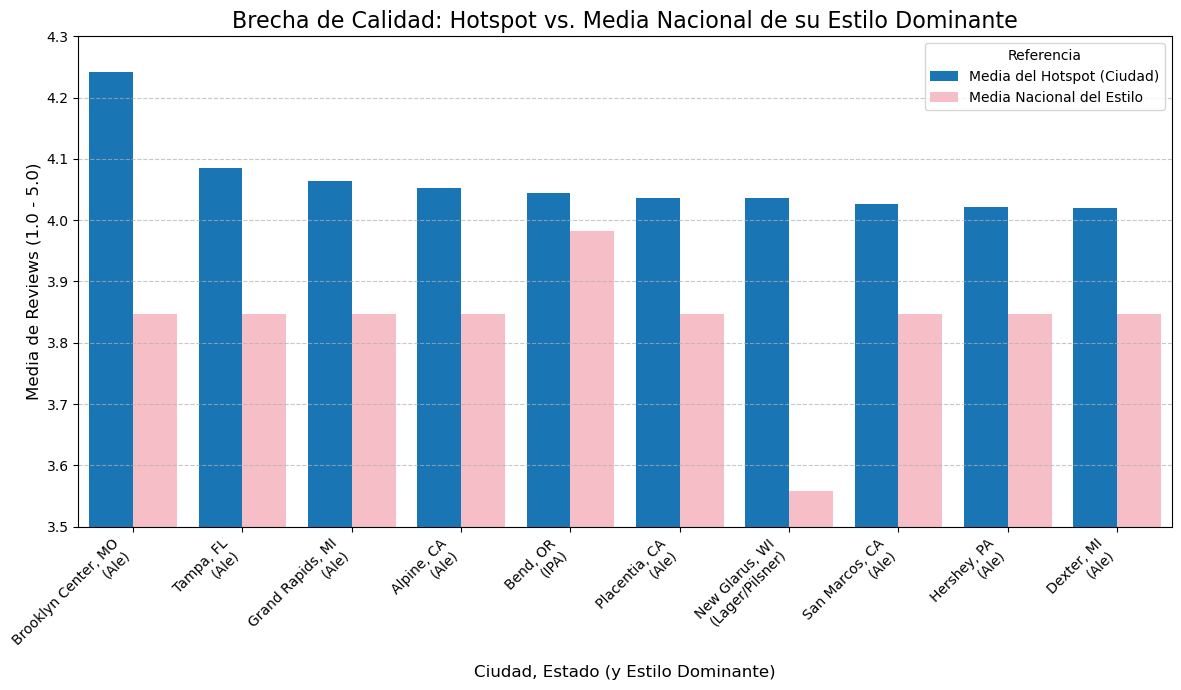

In [183]:
# Gráfico 9

# 1. Recrear el DataFrame final de comparación 
data_comparacion = {
    'city': ['Dexter', 'Hershey', 'San Marcos', 'Placentia', 'New Glarus', 'Bend', 'Alpine', 'Grand Rapids', 'Tampa', 'Brooklyn Center'],
    'media_reviews': [4.020, 4.021, 4.027, 4.037, 4.037, 4.044, 4.053, 4.064, 4.085, 4.241],
    'estilo_dominante_ciudad': ['Ale', 'Ale', 'Ale', 'Ale', 'Lager/Pilsner', 'IPA', 'Ale', 'Ale', 'Ale', 'Ale'],
    'media_nacional_estilo': [3.847, 3.847, 3.847, 3.847, 3.558, 3.983, 3.847, 3.847, 3.847, 3.847],
    'state': ['MI', 'PA', 'CA', 'CA', 'WI', 'OR', 'CA', 'MI', 'FL', 'MO'] 
}
df_comparacion_estilo_final = pd.DataFrame(data_comparacion)

# 2. Crear la ETIQUETA COMBINADA (Ciudad, Estado y Estilo Dominante) para el eje X
df_comparacion_estilo_final['city_state_style'] = (
    df_comparacion_estilo_final['city'] + ', ' + 
    df_comparacion_estilo_final['state'].str.upper() + '\n(' + 
    df_comparacion_estilo_final['estilo_dominante_ciudad'] + ')'
)

# 3. Reestructurar el DataFrame del formato 'wide' a 'long' para Seaborn
df_plot = df_comparacion_estilo_final.melt(
    id_vars=['city_state_style', 'estilo_dominante_ciudad'],
    value_vars=['media_reviews', 'media_nacional_estilo'],
    var_name='Tipo_Rating',
    value_name='Rating_Value'
)

# 4. Mapear los nombres de la columna 'Tipo_Rating' a etiquetas legibles para la leyenda
df_plot['Tipo_Rating'] = df_plot['Tipo_Rating'].map({
    'media_reviews': 'Media del Hotspot (Ciudad)',
    'media_nacional_estilo': 'Media Nacional del Estilo'
})

# 5. Definir el orden de las ciudades (de mayor a menor media de la ciudad)
# Usamos la columna combinada para el orden
orden_ciudades = df_comparacion_estilo_final.sort_values(by='media_reviews', ascending=False)['city_state_style'].tolist()


# 6. Crear la visualización
plt.figure(figsize=(12, 7))

sns.barplot(
    x='city_state_style',
    y='Rating_Value',
    hue='Tipo_Rating',
    data=df_plot,
    order=orden_ciudades,
    # Los colores deben coincidir con las etiquetas renombradas en el Paso 4
    palette={'Media del Hotspot (Ciudad)': '#007ACC', 'Media Nacional del Estilo': '#FFB6C1'}
)

plt.title('Brecha de Calidad: Hotspot vs. Media Nacional de su Estilo Dominante', fontsize=16)
plt.xlabel('Ciudad, Estado (y Estilo Dominante)', fontsize=12)
plt.ylabel('Media de Reviews (1.0 - 5.0)', fontsize=12)
plt.ylim(3.5, 4.3) 
plt.xticks(rotation=45, ha='right')

# Dejamos que Seaborn genere la leyenda automáticamente usando las etiquetas renombradas
plt.legend(title='Referencia', loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Media_ciudad_vs_media_nacional_HD.png', dpi=300)
plt.show()

### Análisis gráfico 9

Nueve de las diez ciudades dominantes tienen 'Ale' o 'IPA' como estilo dominante (la IPA es una subcategoría de Ale).

En todos los casos, la producción de Ale estas ciudades supera la media nacional de Ale (3.847) por un margen que va desde 0.173 hasta 0.394 puntos.

LA Ale de Brooklyn Center no solo es la mejor clasificada, sino que supera la media nacional de Ale por 0.394 puntos. Esto confirma que la ciudad es un outlier porque ha elevado su estilo dominante a un nivel de élite.

La IPA de Bend es solo 0.061 puntos mejor que la IPA promedio nacional (3.983). Esto sugiere que el estilo IPA ya tiene una base tan alta que es más difícil superarlo, mientras que el estilo Ale (más básico y de mayor volumen) ofrece mayor margen para la excelencia.

El caso más relevante es el de New Glarus ya que su estilo dominante es lager/pilsener, que a nivel nacional tiene un promedio de 3.558 puntos, Sin embargo, la producción de lager en esta ciudad supera esa media nacional por 0.479 puntos.Esto demuestra que la calidad percibida en WI es impulsada por la capacidad de la ciudad para producir una versión de élite de un estilo que la mayoría de los productores fallan en ejecutar con excelencia.

# Conclusiones Finales

1. La influencia de la geografía es Indirecta:
 
La alta calidad percibida de cada estado no es uniforme, sino que está impulsada por ciudades específicas que se comportan como anomalías de calidad extrema (ej., Brooklyn Center, MO y New Glarus, WI).
  
2. La Estrategia es Clave: Los líderes de calidad tienen una estrategia dual:

Estilo: Eligen estilos con potencial de alta calificación (Ale/IPA).

Intensidad: Sus cervezas son consistentemente más fuertes y más amargas (mayor ABV e IBU) que las de los estados rezagados.

3. Excelencia sobre Popularidad: 

La verdadera élite no solo sigue la tendencia (eligen IPA), sino que elevan el estándar de su estilo dominante, superando consistentemente la media nacional de ese estilo por márgenes significativos. New Glarus es el mejor ejemplo, al convertir el estilo de baja calificación (Lager) en un producto de élite.
 
